In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [35]:
data = pd.read_csv(r"C:\Users\krush\Downloads\archive (2)\anemia.csv")

In [36]:
data.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [37]:
data.shape

(1421, 6)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


###Correlation statistics: refers to a statistical measure that describes the strength and direction of the relationship between two variables
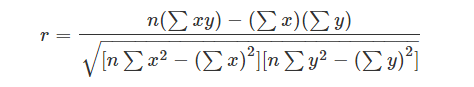




In [39]:
data.corr()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
Gender,1.000000,0.010972,0.001042,0.014574,-0.040447,0.253169
Hemoglobin,0.010972,1.000000,0.014081,-0.042597,-0.025885,-0.796261
MCH,0.001042,0.014081,1.000000,0.018795,-0.015948,-0.028678
MCHC,0.014574,-0.042597,0.018795,1.000000,0.068450,0.048067
MCV,-0.040447,-0.025885,-0.015948,0.068450,1.000000,-0.020571
Result,0.253169,-0.796261,-0.028678,0.048067,-0.020571,1.000000


# New Section

*   Positive correlation : (0 < r <= 1)
*   Negetive correlation : (0 > r >= -1)
*   No correlation : (r == 0)



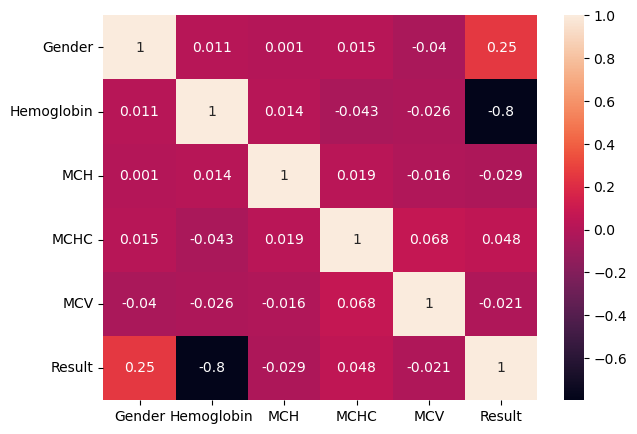

In [40]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(),annot = True)
plt.show()

In [41]:
data.columns

Index(['Gender', 'Hemoglobin', 'MCH', 'MCHC', 'MCV', 'Result'], dtype='object')



*   MCV: The average size of red blood cells
*   MCH: The average amount of hemoglobin in red blood cells
*   MCHC: The average amount of hemoglobin concentration in red blood cells




In [42]:
data.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,0.520760,13.412738,22.905630,30.251232,85.523786,0.436312
std,0.499745,1.974546,3.969375,1.400898,9.636701,0.496102
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.700000,19.400000,29.000000,77.300000,0.000000
50%,1.000000,13.200000,22.700000,30.400000,85.300000,0.000000
75%,1.000000,15.000000,26.200000,31.400000,94.200000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


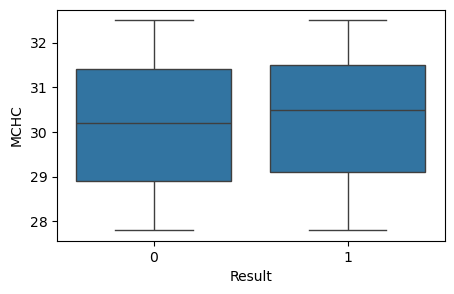

In [43]:
plt.figure(figsize = (5,3))
sns.boxplot(data = data , y = 'MCHC' , x = 'Result')
plt.show()

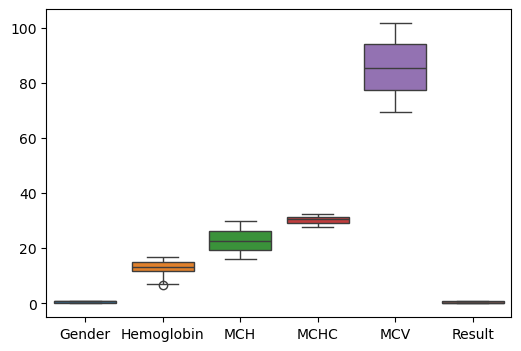

In [44]:
plt.figure(figsize = (6,4))
sns.boxplot(data = data.select_dtypes(include = 'number'))
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
x = np.array(data[['Gender', 'Hemoglobin', 'MCH', 'MCHC', 'MCV']])
y = np.array(data[['Result']])

In [46]:
from sklearn.ensemble import RandomForestClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.33, random_state=42)
model = RandomForestClassifier()
model.fit(xtrain,ytrain)

RandomForestClassifier()

In [47]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(xtest)
print(accuracy_score(ytest,y_pred))

1.0


In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,y_pred)

array([[266,   0],
       [  0, 203]], dtype=int64)

In [49]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       203

    accuracy                           1.00       469
   macro avg       1.00      1.00      1.00       469
weighted avg       1.00      1.00      1.00       469



In [51]:
print("Anemia prediction: ")
gender = int(input("Enter gender (0 for female, 1 for male): "))
hemoglobin = float(input("Enter hemoglobin value: "))
mch = float(input("Enter mch value: "))
mchc = float(input("Enter mchc value: "))
mcv = float(input("Enter mcv value: "))
feature = np.array([[gender, hemoglobin, mch, mchc, mcv]])
prediction = model.predict(feature)
if prediction == 0:
  print("The person is not suffering from anemia")
else:
  print("The person is suffering from anemia")
print(prediction)

Anemia prediction: 
The person is not suffering from anemia
[0]


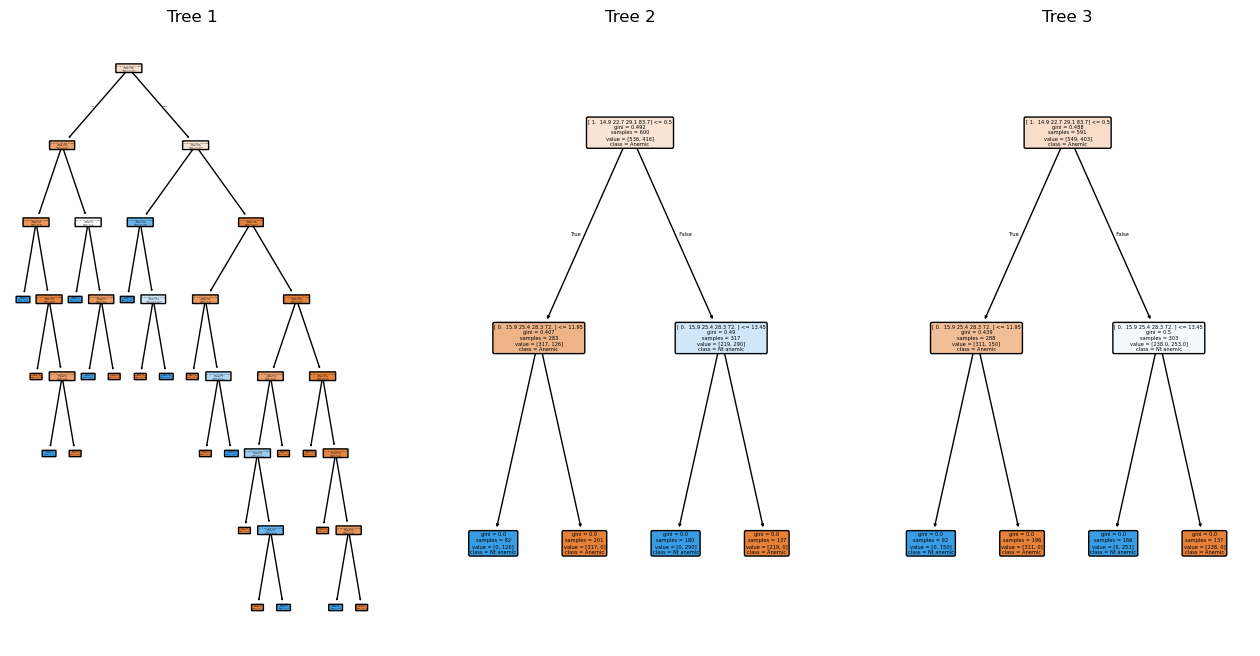

In [59]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(16, 8))
for i, tree_in_forest in enumerate(model.estimators_[:3]):  # Plot the first 3 trees
    plt.subplot(1, 3, i + 1)
    plot_tree(tree_in_forest, feature_names=x, class_names=['Anemic', 'Nt anemic'], filled=True, rounded=True)
    plt.title(f"Tree {i + 1}")
plt.show()